# TikTok Project


### Project Question

You have just started as a data professional at TikTok.

The team is still in the early stages of the project. You have received notice that TikTok's leadership team has approved the project proposal. To gain clear insights to prepare for a claims classification model, TikTok's provided data must be examined to begin the process of exploratory data analysis (EDA).

Orion Rainier, a Data Scientist at TikTok, is pleased with the work you have already completed and is requesting your assistance with some Data wrangling and data visualization. The management team asked to see a Python notebook showing data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help us understand the data. At the very least, include a graph comparing claim counts to opinion counts, as well as boxplots of the most important variables (like “video duration,” “video like count,” “video comment count,” and “video view count”) to check for outliers. Also, include a breakdown of “author ban status” counts.

**Data sources used**

This project uses a dataset called `tiktok_dataset.csv`. It contains synthetic data created for this project in partnership with TikTok. Below are the variables in the data you will be working with.

**Data Dictionary**

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
|# |	TikTok assigned number for video with claim/opinion.|
|claim_status |	Whether the published video has been identified as an “opinion” or a “claim.” In this dataset, an “opinion” refers to an individual’s or group’s personal belief or thought. A “claim” refers to information that is either unsourced or from an unverified source.|
|video_id |	Random identifying number assigned to video upon publication on TikTok|
|video_duration_sec |	How long the published video is measured in seconds|
|video_transcription_text |	Transcribed text of the words spoken in the published video |
|verified_status |Indicates the status of the TikTok user who published the video in terms of their verification, either “verified” or “not verified.” 	|
|author_ban_status |Indicates the status of the TikTok user who published the video in terms of their permissions: “active,” “under scrutiny,” or “banned.” |
|video_view_count |	The total number of times the published video has been viewed. |
|video_like_count | The total number of times the published video has been liked by other users.	|
|video_share_count |The total number of times the published video has been shared by other users.	|
|video_download_count |	The total number of times the published video has been downloaded by other users|
|video_comment_count |	The total number of comments on the published video. |


**Business Task**

In this activity, you will examine data provided and prepare it for analysis. You will also design a professional data visualization that tells a story, and will help data-driven decisions for business needs.

**The purpose** of this project is to conduct exploratory data analysis on a provided data set. Your mission is to continue the investigation you began in C2 and perform further EDA on this data with the aim of learning more about the variables. Of particular interest is information related to what distinguishes claim videos from opinion videos.

**The goal** is to explore the dataset and create visualizations.

<br/>

*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning

**Part 3:** Build visualizations

## **1. Imports and data loading**

I will be loading the dataset from my google drive.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/My Drive/PF'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/PF


In [ ]:
## TODO: import necessary libraries and the data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset into dataframe
df=pd.read_csv('tiktok_dataset.csv')

 I will  be Viewing and inspecting the summary information about the dataframe
and Consider the following:

* What does each row represent?

* Are there any null values? Are all of the variables numeric? Does anything else stand out?

* Are there any questionable values? Does it seem that there are outlier values?

In [ ]:
df.head(10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


In [ ]:
df[df['video_like_count']==0]

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
5909,5910,claim,5646645946,36,a colleague learned online that the city with...,not verified,active,202144.0,0.0,0.0,0.0,0.0
11290,11291,opinion,2439864925,18,my view is that a dog’s sense of smell is much...,not verified,active,1379.0,0.0,0.0,0.0,0.0
17154,17155,opinion,9528935323,20,i can say that the largest recorded snowflake ...,not verified,under review,222.0,0.0,0.0,0.0,0.0
18456,18457,opinion,8133192692,24,my colleagues are willing to bet that the suns...,not verified,active,105.0,0.0,0.0,0.0,0.0


 Here's an overview of the columns in the dataset:

\#: A unique identifier for each row. Like an index

claim_status: Indicates the status of the claim.

video_id: Unique identifier for each video.

video_duration_sec: Duration of the video in seconds.

video_transcription_text: Transcription of the video content.

verified_status: Indicates whether the claim has been verified or not.

author_ban_status: Indicates whether the author of the claim is banned or not.

video_view_count: Number of views the video has received.

video_like_count: Number of likes the video has received.

video_share_count: Number of times the video has been shared.

video_download_count: Number of times the video has been downloaded.

video_comment_count: Number of comments on the video.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


My observations about the different variables in the dataset are:

# Null Values:

claim_status: 298 null values (19382 non-null entries out of 19084 total entries).

video_transcription_text: 298 null values (19382 non-null entries out of 19084 total entries).

video_view_count: 298 null values (19382 non-null entries out of 19084 total entries).

video_like_count: 298 null values (19382 non-null entries out of 19084 total entries).

video_share_count: 298 null values (19382 non-null entries out of 19084 total entries).

video_download_count: 298 null values (19382 non-null entries out of 19084 total entries).

video_comment_count: 298 null values (19382 non-null entries out of 19084 total entries).

# Data Types:

claim_status, video_transcription_text, verified_status, and author_ban_status are of object (string) data type.

video_id, video_duration_sec, video_view_count, video_like_count, video_share_count, video_download_count, and video_comment_count are of numeric data types.

In [ ]:
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


** Things to Do **


The video_id column should be converted to string

The claim_status, verified_status and author_ban_status column should be converted to categorical data

In [ ]:
# Descriptive Statistical Analysis
df['claim_status'] = df['claim_status'].astype('category')
df['verified_status'] = df['verified_status'].astype('category')
df['author_ban_status'] = df['author_ban_status'].astype('category')

In [ ]:
# Descriptive Statistical Analysis
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


**Observations:**

* The dataframe contains a collection of categorical, text, and numerical data. Each row represents a distinct TikTok video that presents either a claim or an opinion and the accompanying metadata about that video.

* The dataframe contains five float64s, three int64s, and four objects. There are 19,382 observations, but some of the variables are missing values, including claim status, the video transcripton, and all of the count variables.

* Many of the count variables seem to have outliers at the high end of the distribution. They have very large standard deviations and maximum values that are very high compared to their quartile values.

## **2. Explore the distribution of `video_duration_sec`.**


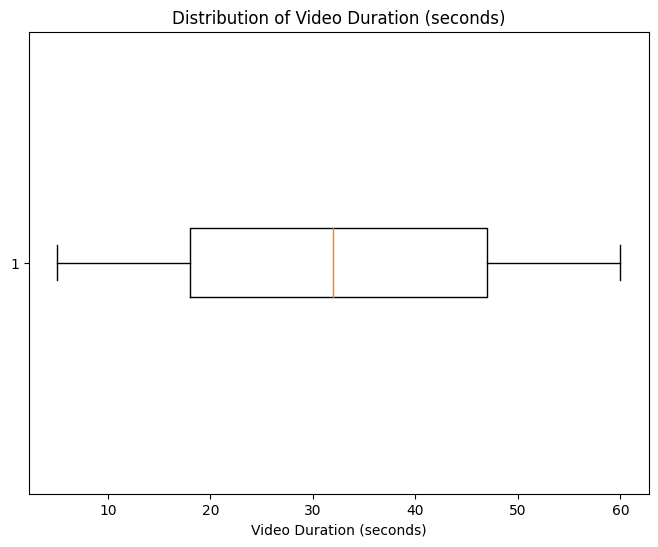

In [ ]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize=(8, 6))
plt.boxplot(df['video_duration_sec'], vert=False)
plt.title('Distribution of Video Duration (seconds)')
plt.xlabel('Video Duration (seconds)')
plt.show()

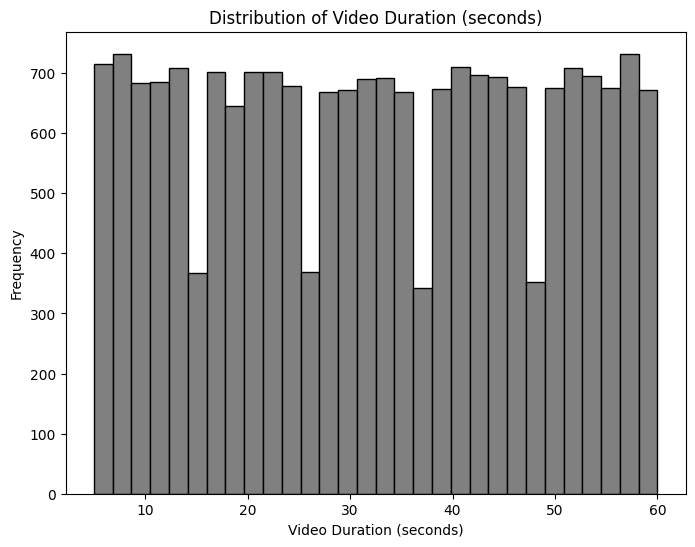

In [ ]:
# Create a histogram of the values in the `video_duration_sec` column
plt.figure(figsize=(8, 6))
plt.hist(df['video_duration_sec'], bins=30, color='gray', edgecolor='black')
plt.title('Distribution of Video Duration (seconds)')
plt.xlabel('Video Duration (seconds)')
plt.ylabel('Frequency')
plt.show()


The shape of the histogram shows that it is uniformly distributed and it is multimodal

## **3. Explore the distribution of `video_view_count`.**


In [ ]:
df['video_view_count']

0        343296.0
1        140877.0
2        902185.0
3        437506.0
4         56167.0
           ...   
19377         NaN
19378         NaN
19379         NaN
19380         NaN
19381         NaN
Name: video_view_count, Length: 19382, dtype: float64

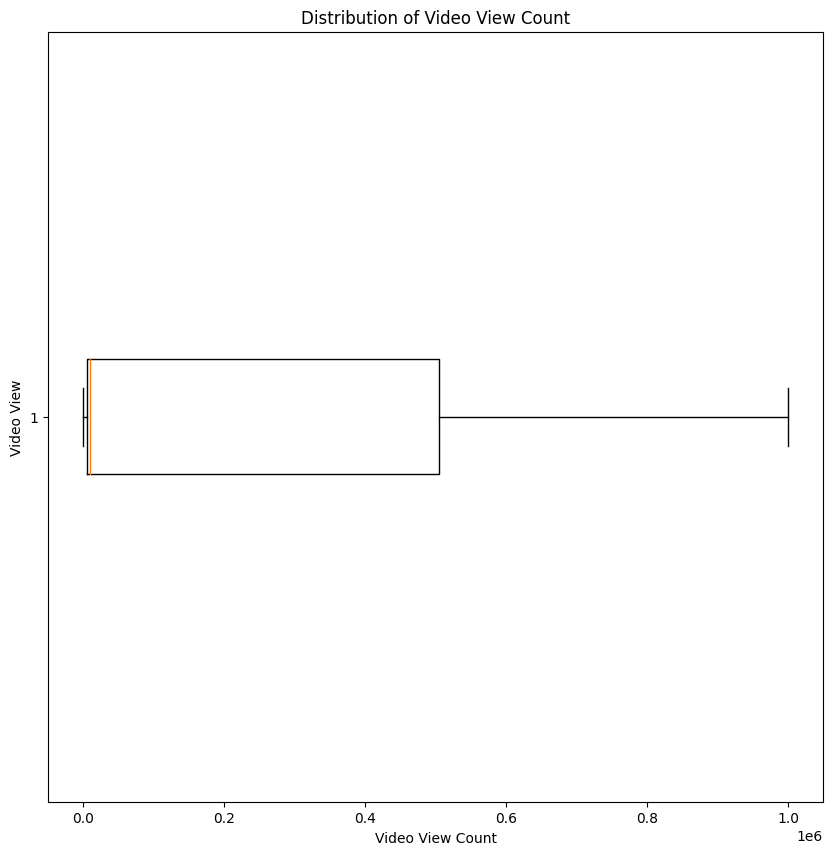

In [ ]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(10, 10))
plt.boxplot(df['video_view_count'].dropna(), vert=False)
plt.title('Distribution of Video View Count')
plt.xlabel('Video View Count')
plt.ylabel('Video View')
plt.show()


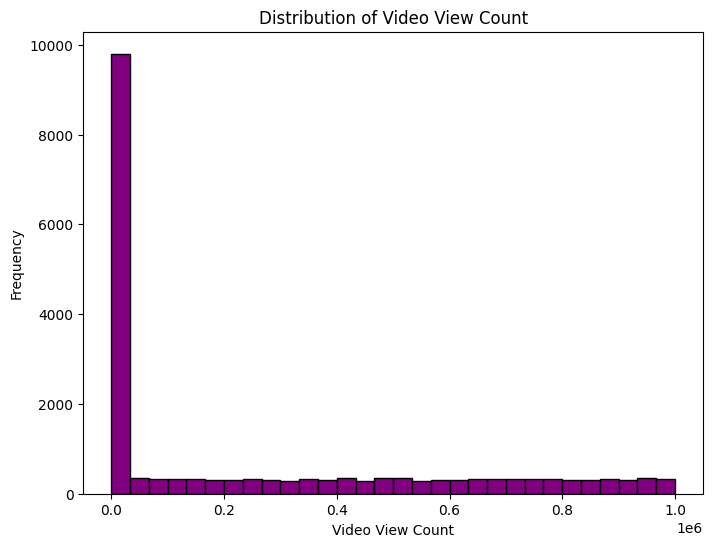

In [ ]:
# Create a histogram to visualize distribution of `video_view_count`
plt.figure(figsize=(8, 6))
plt.hist(df['video_view_count'].dropna(), bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Video View Count')
plt.xlabel('Video View Count')
plt.ylabel('Frequency')
plt.show()



This shows that it is uniformly distributed and it is unimodal

## **4. Explore the distribution of `video_like_count`.**


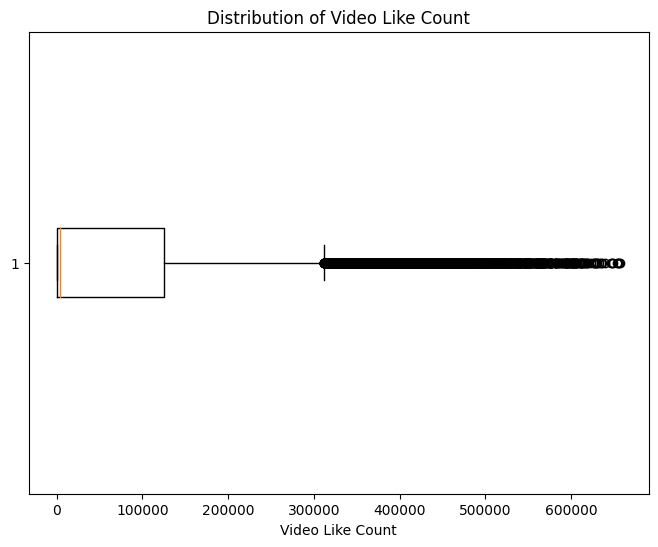

In [ ]:
# Create a boxplot to visualize distribution of `video_like_count`

plt.figure(figsize=(8, 6))
plt.boxplot(df['video_like_count'].dropna(), vert=False)
plt.title('Distribution of Video Like Count')
plt.xlabel('Video Like Count')
plt.show()


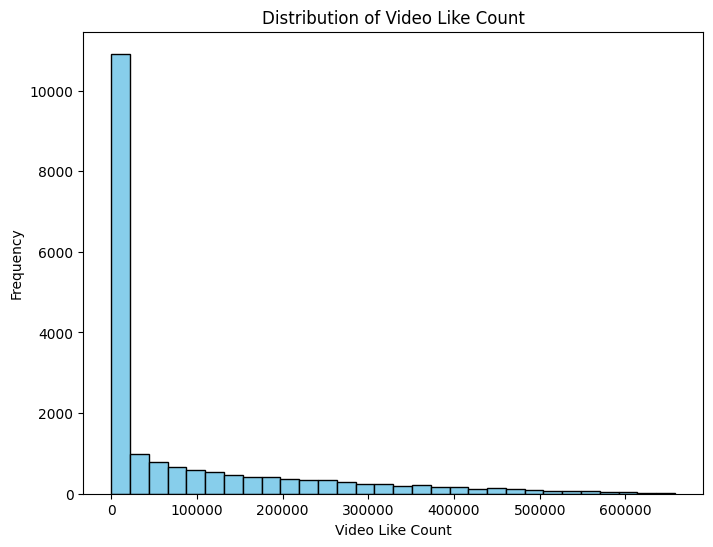

In [ ]:
# Create a histogram of the values in the `video_like_count` column

plt.figure(figsize=(8, 6))
plt.hist(df['video_like_count'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Video Like Count')
plt.xlabel('Video Like Count')
plt.ylabel('Frequency')
plt.show()


This distribution skew to the left and the its unimodal and we have a lot of outliers above the 3rd quartile

## **5. Explore the distribution of `video_comment_count`.**

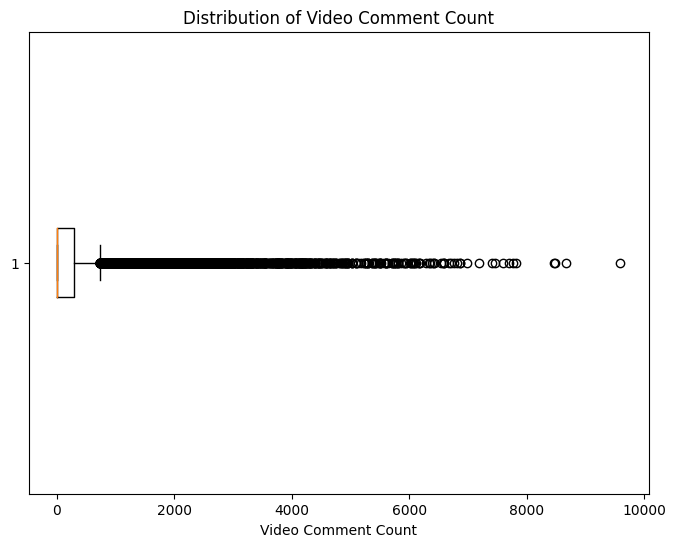

In [ ]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(8, 6))
plt.boxplot(df['video_comment_count'].dropna(), vert=False)
plt.title('Distribution of Video Comment Count')
plt.xlabel('Video Comment Count')
plt.show()


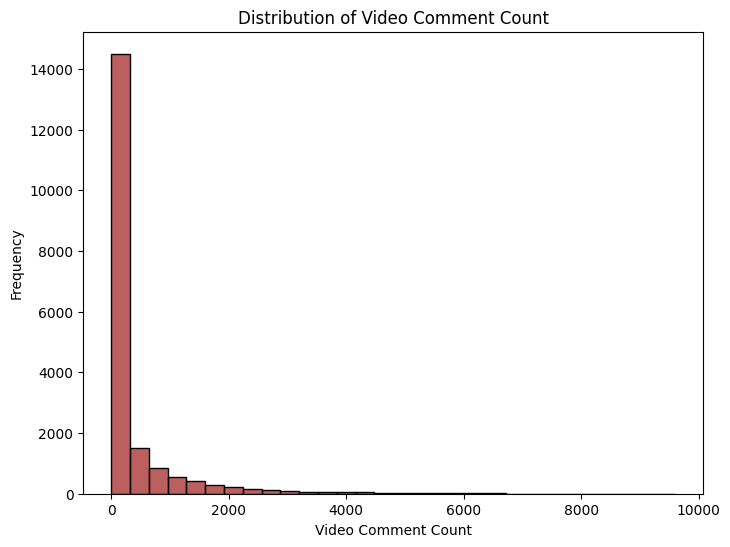

In [ ]:
# Create a histogram to visualize distribution of `video_comment_count`
plt.figure(figsize=(8, 6))
sns.histplot(df['video_comment_count'], bins=30, color='brown', edgecolor='black')
plt.title('Distribution of Video Comment Count')
plt.xlabel('Video Comment Count')
plt.ylabel('Frequency')
plt.show()


This distribution skew to the left and the its unimodal and we have a lot of outliers above the 3rd quartile

## **6. Explore the distribution of `video_share_count`.**

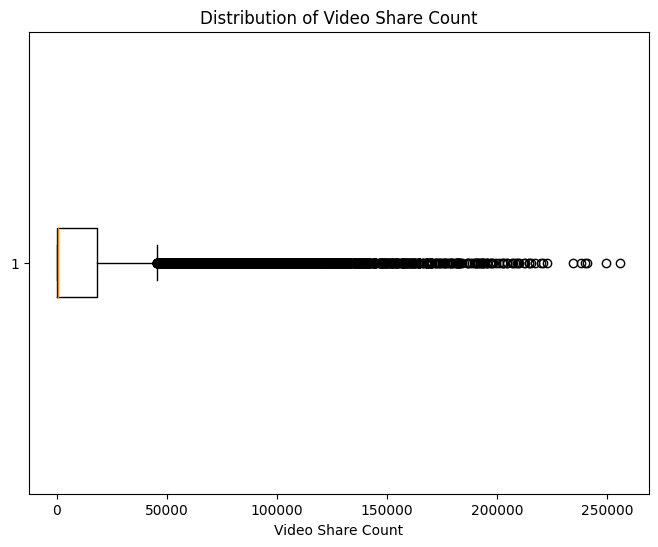

In [ ]:
# Create a boxplot to visualize distribution of `video_share_count`
plt.figure(figsize=(8, 6))
plt.boxplot(df['video_share_count'].dropna(), vert=False)
plt.title('Distribution of Video Share Count')
plt.xlabel('Video Share Count')
plt.show()

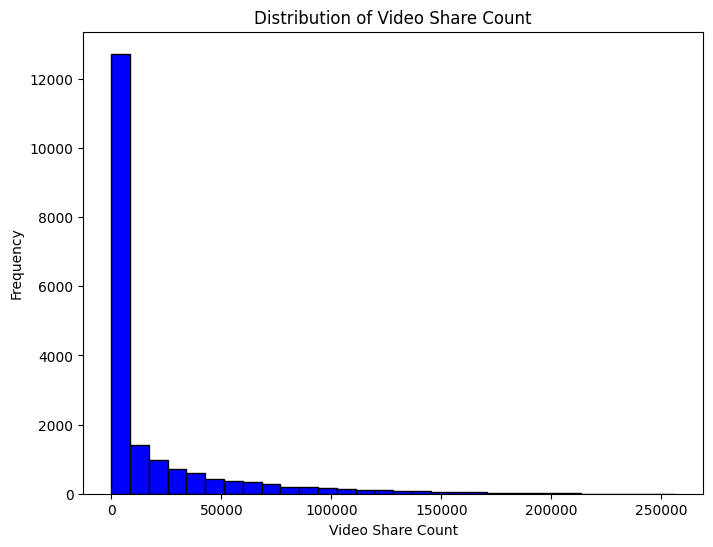

In [ ]:
# Create a histogram to visualize distribution of `video_share_count`
plt.figure(figsize=(8, 6))
plt.hist(df['video_share_count'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Video Share Count')
plt.xlabel('Video Share Count')
plt.ylabel('Frequency')
plt.show()

This distribution skew to the left and the its unimodal and we have a lot of outliers above the 3rd quartile

## **7. Explore the distribution of `video_download_count`.**

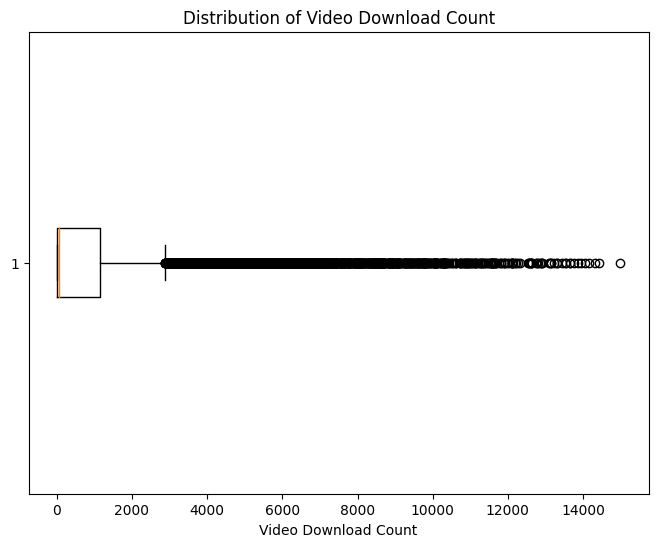

In [ ]:
# Create a boxplot to visualize distribution of `video_download_count`
plt.figure(figsize=(8, 6))
plt.boxplot(df['video_download_count'].dropna(), vert=False)
plt.title('Distribution of Video Download Count')
plt.xlabel('Video Download Count')
plt.show()

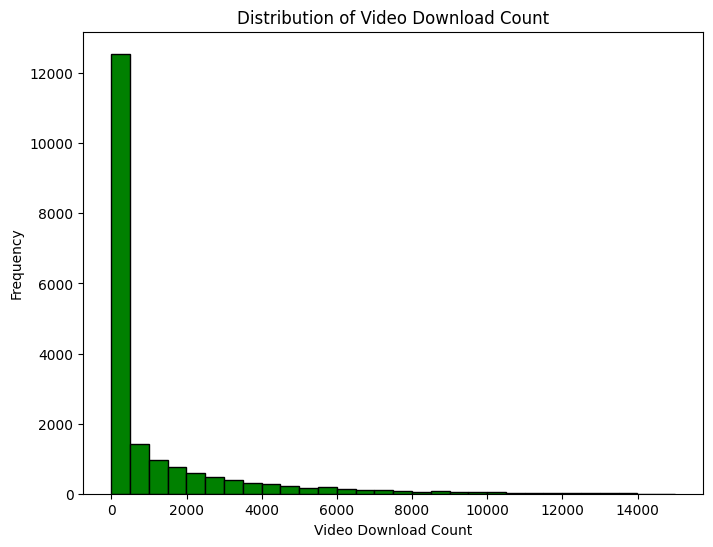

In [ ]:
# Create a histogram to visualize distribution of `video_download_count`
plt.figure(figsize=(8, 6))
plt.hist(df['video_download_count'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of Video Download Count')
plt.xlabel('Video Download Count')
plt.ylabel('Frequency')
plt.show()

This distribution skew to the left and the its unimodal and we have a lot of outliers above the 3rd quartile

## **8. Claim status by author ban status**

I will examine the count of each claim status for each author ban status and then a side-by-side barplot to communicate the same information.

In [ ]:
# Get counts for each group combination of claim status and author ban status
grouped_counts = df.groupby(['claim_status', 'author_ban_status']).size().reset_index(name='Frequency')
grouped_counts

,claim_status,author_ban_status,Frequency
0,claim,active,6566
1,claim,banned,1439
2,claim,under review,1603
3,opinion,active,8817
4,opinion,banned,196
5,opinion,under review,463


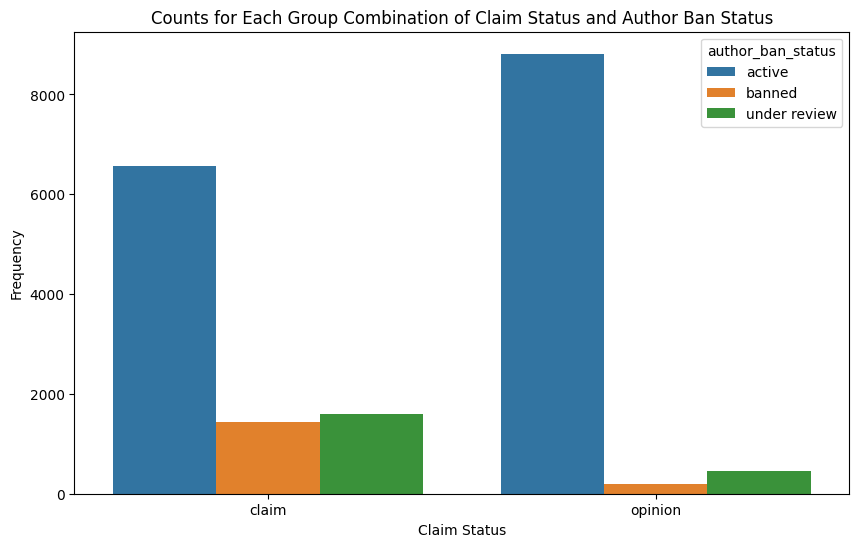

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='claim_status', y='Frequency', hue='author_ban_status', data=grouped_counts)
plt.title('Counts for Each Group Combination of Claim Status and Author Ban Status')
plt.xlabel('Claim Status')
plt.ylabel('Frequency')
plt.show()

## **9. Median view counts by ban status**

I will create a bar plot with three bars: one for each author ban status.

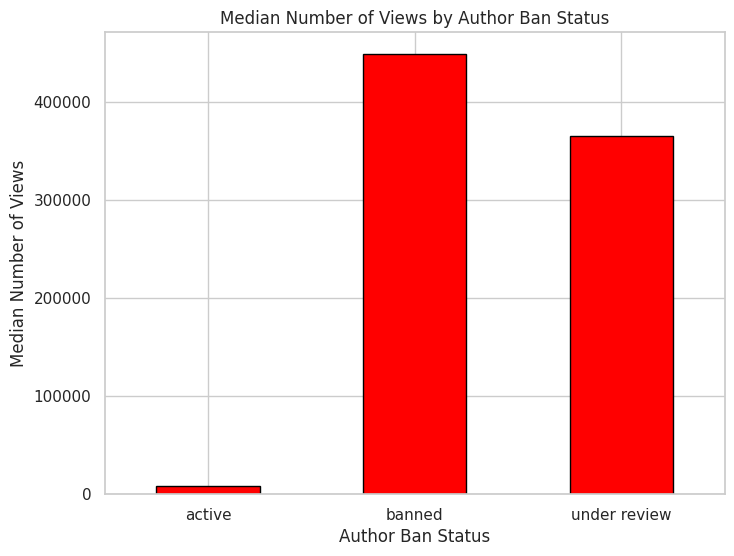

In [ ]:
median_views_by_ban_status = df.groupby('author_ban_status')['video_view_count'].median()
plt.figure(figsize=(8, 6))
median_views_by_ban_status.plot(kind='bar', color='red', edgecolor='black')
plt.title('Median Number of Views by Author Ban Status')
plt.xlabel('Author Ban Status')
plt.ylabel('Median Number of Views')
plt.xticks(rotation=0)
plt.show()

## **10. Determine outliers**

The ultimate objective of the TikTok project is to build a model that predicts whether a video is a claim or opinion. The analysis performed indicates that a video's engagement level is strongly correlated with its claim status. There's no reason to believe that any of the values in the TikTok data are erroneously captured, and they align with expectation of how social media works: a very small proportion of videos get super high engagement levels. That's the nature of viral content.

In this TikTok dataset, the values for the count variables are not normally distributed. They are heavily skewed to the right. One way of modifying the outlier threshold is by calculating the **median** value for each variable and then adding 1.5 * IQR. This results in a threshold that is, in this case, much lower than it would be if you used the 3rd quartile.

In [ ]:
num_columns = ['video_duration_sec',	'video_view_count', 'video_like_count',	'video_share_count',	'video_download_count',	'video_comment_count']

for column in num_columns:

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    median = df[column].median()


    outlier_threshold = median + 1.5 * IQR


    outlier_count = df[df[column] > outlier_threshold][column].count()


    print(f"Number of outliers, {column}: {outlier_count}")

Number of outliers, video_duration_sec: 0
Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


## **11. Scatterplot**

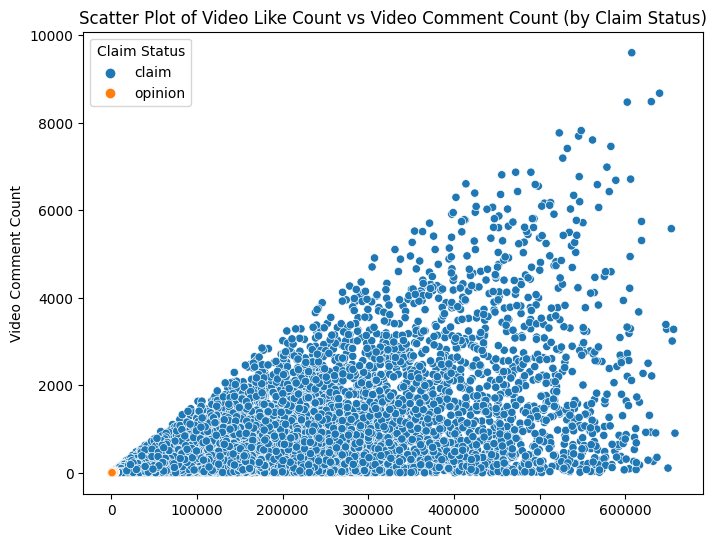

In [ ]:
# Create a scatterplot of `video_like_count` versus `video_comment_count` according to 'claim_status'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='video_like_count', y='video_comment_count', hue='claim_status', data=df)
plt.title('Scatter Plot of Video Like Count vs Video Comment Count (by Claim Status)')
plt.xlabel('Video Like Count')
plt.ylabel('Video Comment Count')
plt.legend(title='Claim Status')
plt.show()

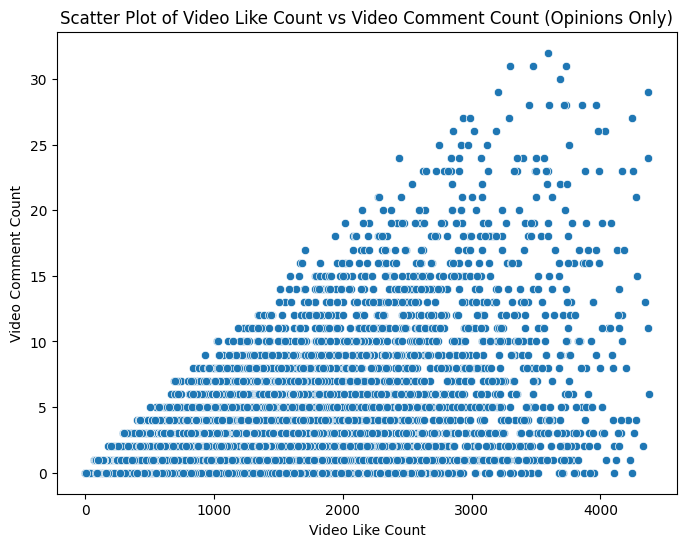

In [ ]:
# Create a scatterplot of `video_like_count` versus `video_comment_count` for opinions only
opinions_df = df[df['claim_status'] == 'opinion']
plt.figure(figsize=(8, 6))
sns.scatterplot(x='video_like_count', y='video_comment_count', data=opinions_df)
plt.title('Scatter Plot of Video Like Count vs Video Comment Count (Opinions Only)')
plt.xlabel('Video Like Count')
plt.ylabel('Video Comment Count')
plt.show()